In [1]:
import numpy as np
import pandas as pd

In [2]:
df=pd.read_csv("/media/kibria/624309e6-cae1-4eca-a603-4ebc61fc0d9b/data/train.csv")

In [3]:
df.shape

(42000, 785)

In [4]:
import matplotlib.pyplot as plt

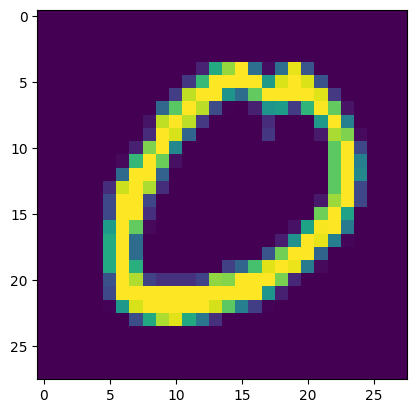

In [8]:
plt.imshow(df.iloc[13051,1:].values.reshape(28,28))

In [9]:
X = df.iloc[:,1:]
y = df.iloc[:,0]

In [10]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [11]:
from sklearn.neighbors import KNeighborsClassifier

In [12]:
knn=KNeighborsClassifier()

In [13]:
knn.fit(X_train,y_train)

,n_neighbors,5
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [14]:
import time
start = time.time()
y_pred = knn.predict(X_test)
print(time.time() - start)

3.5575408935546875


In [15]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.9648809523809524

In [16]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# PCA 
from sklearn.decomposition import PCA
pca = PCA(n_components=200)

X_train_trf = pca.fit_transform(X_train)
X_test_trf = pca.transform(X_test)



In [17]:
knn = KNeighborsClassifier()

knn.fit(X_train_trf,y_train)

y_pred = knn.predict(X_test_trf)

accuracy_score(y_test,y_pred)



0.9507142857142857

In [18]:
for i in range(1,785):
    pca = PCA(n_components=i)
    X_train_trf = pca.fit_transform(X_train)
    X_test_trf = pca.transform(X_test)
    
    knn = KNeighborsClassifier()
    
    knn.fit(X_train_trf,y_train)
    
    y_pred = knn.predict(X_test_trf)
    
    print(accuracy_score(y_test,y_pred))

0.2580952380952381
0.3236904761904762
0.5104761904761905
0.6663095238095238
0.7378571428571429
0.8227380952380953
0.8436904761904762
0.8721428571428571
0.886547619047619
0.9055952380952381
0.9116666666666666
0.9184523809523809
0.9276190476190476
0.9351190476190476
0.9384523809523809
0.9379761904761905
0.9407142857142857
0.94
0.9425
0.9442857142857143
0.9438095238095238
0.9441666666666667
0.9442857142857143
0.9457142857142857
0.9484523809523809
0.9479761904761905
0.9478571428571428
0.9471428571428572
0.949047619047619
0.9491666666666667
0.9507142857142857
0.9513095238095238
0.95
0.9504761904761905
0.950952380952381
0.9519047619047619
0.9517857142857142
0.9527380952380953
0.9533333333333334
0.9528571428571428
0.9522619047619048
0.9522619047619048
0.9523809523809523
0.9533333333333334
0.9528571428571428
0.9530952380952381
0.9530952380952381
0.9533333333333334
0.9527380952380953
0.9533333333333334
0.9545238095238096
0.954047619047619
0.9541666666666667
0.9541666666666667
0.9546428571428571

KeyboardInterrupt: 

In [19]:
# transforming to a 2D coordinate system
pca = PCA(n_components=2)
X_train_trf = pca.fit_transform(X_train)
X_test_trf = pca.transform(X_test)

In [20]:
import plotly.express as px
y_train_trf = y_train.astype(str)
fig = px.scatter(x=X_train_trf[:,0],
                 y=X_train_trf[:,1],
                 color=y_train_trf,
                 color_discrete_sequence=px.colors.qualitative.G10
                )
fig.show()

In [21]:
# transforming in 3D
pca = PCA(n_components=3)
X_train_trf = pca.fit_transform(X_train)
X_test_trf = pca.transform(X_test)

In [23]:
import plotly.express as px

fig = px.scatter_3d(
    x=X_train_trf[:, 0],
    y=X_train_trf[:, 1],
    z=X_train_trf[:, 2],
    color=y_train.astype(str)  # convert labels to string for coloring
)
fig.update_layout(
    margin=dict(l=20, r=20, t=20, b=20),
    paper_bgcolor="LightSteelBlue"
)
fig.show()


In [24]:
pca.explained_variance_

array([40.67111198, 29.17023401, 26.74459621])

In [25]:
pca.components_.shape

(3, 784)

In [26]:
pca.explained_variance_ratio_

array([0.05785192, 0.0414927 , 0.03804239])

In [27]:
pca=PCA(n_components=None)
X_train_trf = pca.fit_transform(X_train)
X_test_trf = pca.transform(X_test)

In [28]:
pca.explained_variance_.shape

(784,)

In [29]:
pca.components_.shape

(784, 784)

In [30]:
np.cumsum(pca.explained_variance_ratio_)

array([0.05785192, 0.09934462, 0.13738701, 0.16704964, 0.19286525,
       0.21541506, 0.23514574, 0.25289854, 0.26858504, 0.28294568,
       0.29664822, 0.30892077, 0.32038989, 0.33162017, 0.34220546,
       0.35240477, 0.36198153, 0.37140862, 0.38053351, 0.38943521,
       0.39783462, 0.40603525, 0.41388828, 0.42145568, 0.42882829,
       0.43584714, 0.44282633, 0.44953738, 0.45593583, 0.4622392 ,
       0.46839271, 0.4744166 , 0.48025334, 0.48603881, 0.49176214,
       0.49722614, 0.50265822, 0.50793994, 0.51307376, 0.51801392,
       0.52289063, 0.52771041, 0.53239246, 0.53698588, 0.54156249,
       0.54605468, 0.5505015 , 0.55491691, 0.55926803, 0.56358836,
       0.56780645, 0.57198888, 0.57606882, 0.58008887, 0.58407223,
       0.58801822, 0.59188694, 0.59571889, 0.59948441, 0.60322635,
       0.60687487, 0.6104829 , 0.61402176, 0.61750117, 0.62094441,
       0.62432378, 0.62767368, 0.63099377, 0.63426257, 0.63746765,
       0.64065542, 0.64376931, 0.64686564, 0.64992395, 0.65296

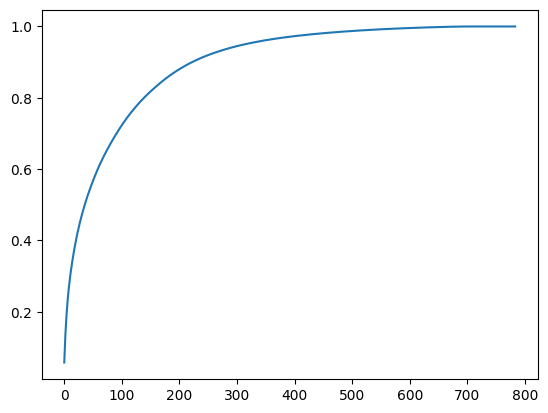

In [31]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))